In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Loading Data Files

In [38]:
train_data = pd.read_csv('/Users/nsumesh/Documents/GitHub/ProductDemandForecasting/data/raw/train.csv')
test_data = pd.read_csv('/Users/nsumesh/Documents/GitHub/ProductDemandForecasting/data/raw/test.csv')
holidays_event_data = pd.read_csv('/Users/nsumesh/Documents/GitHub/ProductDemandForecasting/data/raw/holidays_events.csv')
oil_data = pd.read_csv('/Users/nsumesh/Documents/GitHub/ProductDemandForecasting/data/raw/oil.csv')
stores_data = pd.read_csv('/Users/nsumesh/Documents/GitHub/ProductDemandForecasting/data/raw/stores.csv')
transactions_data = pd.read_csv('/Users/nsumesh/Documents/GitHub/ProductDemandForecasting/data/raw/transactions.csv')
sample_submission_data = pd.read_csv('/Users/nsumesh/Documents/GitHub/ProductDemandForecasting/data/raw/sample_submission.csv')

In [39]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None


Looking at unique stores/items

In [40]:
print("Unique Stores:", train_data['store_nbr'].nunique())

Unique Stores: 54


Sales Distribution

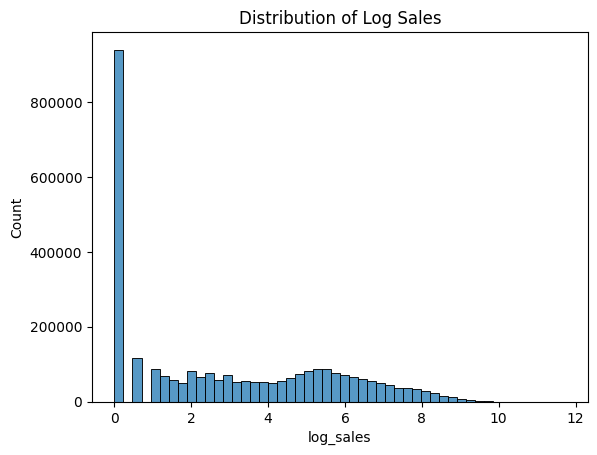

In [41]:
train_data['log_sales'] = np.log1p(train_data['sales'])
sns.histplot(train_data['log_sales'], bins=50)
plt.title("Distribution of Log Sales")
plt.show()

Sales Over Time

<Axes: title={'center': 'Sales Over Time'}, xlabel='date'>

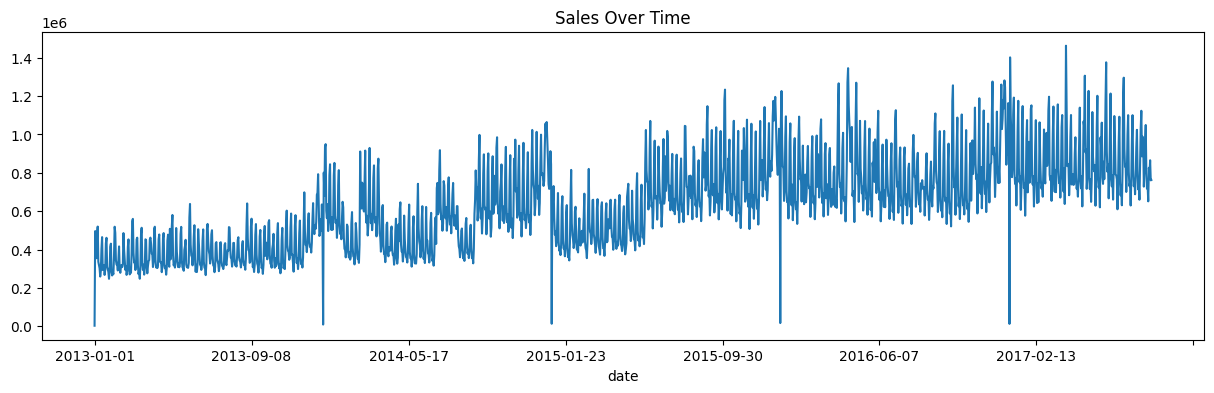

In [42]:
daily_sales = train_data.groupby('date')['sales'].sum()
daily_sales.plot(figsize=(15,4), title='Sales Over Time')

Sales over Store

<Axes: title={'center': 'Total Sales over store'}, xlabel='store_nbr'>

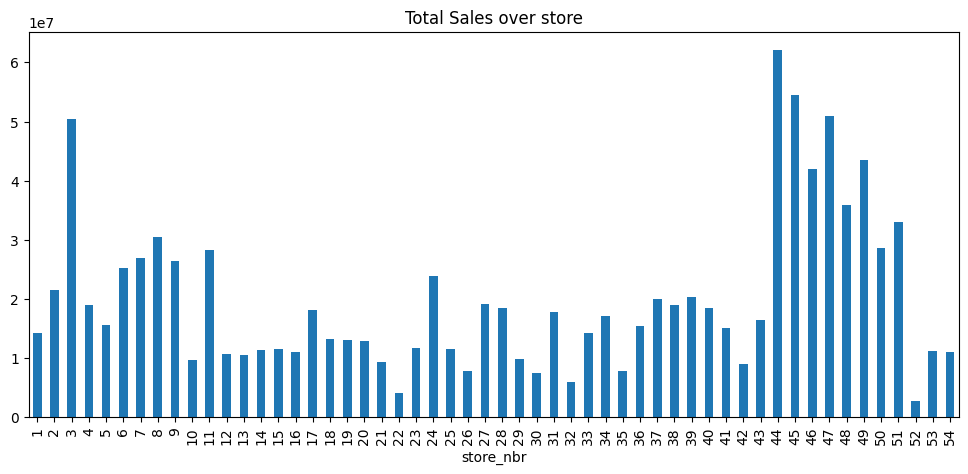

In [43]:
store_sales = train_data.groupby("store_nbr")['sales'].sum()
store_sales.plot(kind='bar',figsize=(12,5), title='Total Sales over store')


In [44]:
merged_train_stores = pd.merge(train_data, stores_data, on='store_nbr', how='left')
store_sales = merged_train_stores.groupby("store_nbr")['sales'].sum()
store_quartiles = pd.qcut(store_sales, q=4, labels=['low','mid_low','mid_high','high'])
store_quartiles
store_sales_merged = pd.merge(store_sales, store_quartiles, on='store_nbr', how='left')
store_sales_merged.rename(columns={'sales_x':'total_sales'}, inplace=True)
store_sales_merged.rename(columns={'sales_y':'quartile'}, inplace=True)
store_sales


store_nbr
1     1.414501e+07
2     2.155739e+07
3     5.048191e+07
4     1.890970e+07
5     1.559240e+07
6     2.518368e+07
7     2.695205e+07
8     3.049429e+07
9     2.640944e+07
10    9.613906e+06
11    2.832556e+07
12    1.065922e+07
13    1.052305e+07
14    1.138792e+07
15    1.145127e+07
16    1.098641e+07
17    1.803097e+07
18    1.325938e+07
19    1.304951e+07
20    1.292095e+07
21    9.255506e+06
22    4.090202e+06
23    1.165138e+07
24    2.376773e+07
25    1.142100e+07
26    7.755122e+06
27    1.918802e+07
28    1.838315e+07
29    9.725158e+06
30    7.382074e+06
31    1.774687e+07
32    5.951796e+06
33    1.417850e+07
34    1.709073e+07
35    7.676679e+06
36    1.532243e+07
37    1.997064e+07
38    1.886000e+07
39    2.025219e+07
40    1.839576e+07
41    1.499104e+07
42    8.945768e+06
43    1.639169e+07
44    6.208755e+07
45    5.449801e+07
46    4.189606e+07
47    5.094831e+07
48    3.593313e+07
49    4.342010e+07
50    2.865302e+07
51    3.291149e+07
52    2.696170e+06
53

On Promotion Flag Distribution

In [45]:
print("Proportion of records on promotion: ", train_data["onpromotion"].mean())

Proportion of records on promotion:  2.6027702466736513


Merge with store metadata for grouped analysis

type
A    0.278406
B    0.333005
C    0.359604
D    0.266766
E    0.383448
Name: sales, dtype: float64

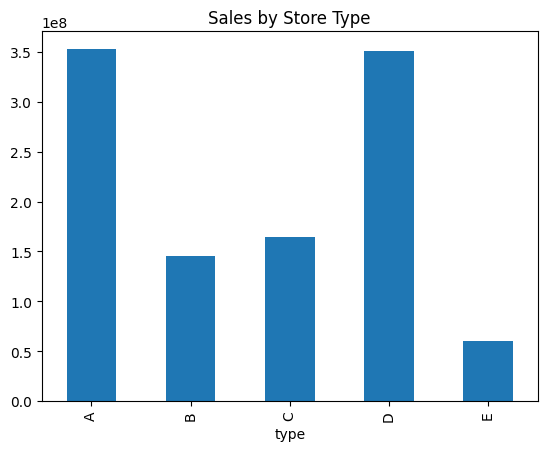

In [46]:
train_store_data = train_data.merge(stores_data, on='store_nbr', how='left')
type_map = {'A':0, 'B':1, 'C':2, 'D':3,'E':4}
train_store_data["store_type"] = train_store_data['type'].map(type_map)
train_store_data.groupby("type")["sales"].sum().plot(kind="bar", title="Sales by Store Type")
temp_df = train_store_data.groupby('type')["sales"].mean().sort_values
temp_df2 =train_store_data.groupby("type")["sales"].apply(lambda x: (x==0).mean())
temp_df2

In [47]:
transactions_data['date'] = pd.to_datetime(transactions_data['date'])

train_data['date'] = pd.to_datetime(train_data['date']) 
train_data = train_data.merge(transactions_data, on=['date','store_nbr'], how='left')
train_data.shape
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   log_sales     float64       
 7   transactions  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 183.2+ MB
None


In [48]:
train_data = train_data.merge(stores_data, on='store_nbr', how='left')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   log_sales     float64       
 7   transactions  float64       
 8   city          object        
 9   state         object        
 10  type          object        
 11  cluster       int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 274.7+ MB


In [49]:
oil_data['date'] = pd.to_datetime(oil_data['date'])

In [50]:
train_data = train_data.merge(oil_data, on='date', how='left')
train_data.info()

KeyboardInterrupt: 

In [ ]:
holidays_event_data['date'] = pd.to_datetime(holidays_event_data['date'])
holidays_clean = holidays_event_data[
    (holidays_event_data['locale'] == 'National') & 
    (holidays_event_data['transferred'] == False)
]
holidays_clean = holidays_clean[['date']].drop_duplicates()
holidays_clean['is_holiday'] = 1



In [ ]:
train_data = train_data.merge(holidays_clean, on='date', how='left')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   log_sales     float64       
 7   transactions  float64       
 8   city          object        
 9   state         object        
 10  type          object        
 11  cluster       int64         
 12  dcoilwtico    float64       
 13  is_holiday    float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(4)
memory usage: 320.5+ MB


In [ ]:
train_data.rename(columns={'type_x':'type_of_cluster'}, inplace=True)
train_data.rename(columns={'type_y':'holiday_or_not'}, inplace=True)


Date Features

In [ ]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['dayofweek'] = train_data['date'].dt.dayofweek       
train_data['day'] = train_data['date'].dt.day
train_data['month'] = train_data['date'].dt.month
train_data['year'] = train_data['date'].dt.year
train_data['weekofyear'] = train_data['date'].dt.isocalendar().week.astype(int)
train_data['is_weekend'] = train_data['dayofweek'].isin([5, 6]).astype(int)
train_data

,id,date,store_nbr,family,sales,onpromotion,log_sales,transactions,city,state,type,cluster,dcoilwtico,is_holiday,dayofweek,day,month,year,weekofyear,is_weekend
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,0.000000,NaN,Quito,Pichincha,D,13,NaN,1.0,1,1,1,2013,1,0
1,1,2013-01-01,1,BABY CARE,0.000,0,0.000000,NaN,Quito,Pichincha,D,13,NaN,1.0,1,1,1,2013,1,0
2,2,2013-01-01,1,BEAUTY,0.000,0,0.000000,NaN,Quito,Pichincha,D,13,NaN,1.0,1,1,1,2013,1,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,0.000000,NaN,Quito,Pichincha,D,13,NaN,1.0,1,1,1,2013,1,0
4,4,2013-01-01,1,BOOKS,0.000,0,0.000000,NaN,Quito,Pichincha,D,13,NaN,1.0,1,1,1,2013,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,6.084802,2155.0,Quito,Pichincha,B,6,47.57,NaN,1,15,8,2017,33,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,5.046987,2155.0,Quito,Pichincha,B,6,47.57,NaN,1,15,8,2017,33,0
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,7.791824,2155.0,Quito,Pichincha,B,6,47.57,NaN,1,15,8,2017,33,0
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,4.804021,2155.0,Quito,Pichincha,B,6,47.57,NaN,1,15,8,2017,33,0


Lag and Rolling Features

In [ ]:
train_data = train_data.sort_values(['store_nbr', 'family', 'date'])
train_data['lag_1'] = train_data.groupby(['store_nbr', 'family'])['sales'].shift(1)
train_data['lag_7'] = train_data.groupby(['store_nbr', 'family'])['sales'].shift(7)
train_data['rolling_mean_7'] = train_data.groupby(['store_nbr', 'family'])['sales'].shift(1).rolling(window=7).mean()
train_data['rolling_std_7'] = train_data.groupby(['store_nbr', 'family'])['sales'].shift(1).rolling(window=7).std()
train_data['rolling_mean_30'] = train_data.groupby(['store_nbr', 'family'])['sales'].shift(1).rolling(window=30).mean()


In [ ]:
train_data

,id,date,store_nbr,family,sales,onpromotion,log_sales,transactions,city,state,...,day,month,year,weekofyear,is_weekend,lag_1,lag_7,rolling_mean_7,rolling_std_7,rolling_mean_30
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0.000000,NaN,Quito,Pichincha,...,1,1,2013,1,0,NaN,NaN,NaN,NaN,NaN
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,1.098612,2111.0,Quito,Pichincha,...,2,1,2013,1,0,0.0,NaN,NaN,NaN,NaN
3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0,1.386294,1833.0,Quito,Pichincha,...,3,1,2013,1,0,2.0,NaN,NaN,NaN,NaN
5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0,1.386294,1863.0,Quito,Pichincha,...,4,1,2013,1,0,3.0,NaN,NaN,NaN,NaN
7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0,1.791759,1509.0,Quito,Pichincha,...,5,1,2013,1,1,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993627,2993627,2017-08-11,54,SEAFOOD,0.0,0,0.000000,768.0,El Carmen,Manabi,...,11,8,2017,32,0,2.0,0.0,3.000000,4.281744,2.966667
2995409,2995409,2017-08-12,54,SEAFOOD,1.0,1,0.693147,903.0,El Carmen,Manabi,...,12,8,2017,32,1,0.0,3.0,3.000000,4.281744,2.933333
2997191,2997191,2017-08-13,54,SEAFOOD,2.0,0,1.098612,1054.0,El Carmen,Manabi,...,13,8,2017,32,1,1.0,0.0,2.714286,4.347960,2.966667
2998973,2998973,2017-08-14,54,SEAFOOD,0.0,0,0.000000,818.0,El Carmen,Manabi,...,14,8,2017,33,0,2.0,0.0,3.000000,4.203173,3.033333


In [ ]:
train_data['stockout'] = (train_data['sales']==0).astype(int)
train_data

,id,date,store_nbr,family,sales,onpromotion,log_sales,transactions,city,state,...,month,year,weekofyear,is_weekend,lag_1,lag_7,rolling_mean_7,rolling_std_7,rolling_mean_30,stockout
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0.000000,NaN,Quito,Pichincha,...,1,2013,1,0,NaN,NaN,NaN,NaN,NaN,1
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,1.098612,2111.0,Quito,Pichincha,...,1,2013,1,0,0.0,NaN,NaN,NaN,NaN,0
3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0,1.386294,1833.0,Quito,Pichincha,...,1,2013,1,0,2.0,NaN,NaN,NaN,NaN,0
5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0,1.386294,1863.0,Quito,Pichincha,...,1,2013,1,0,3.0,NaN,NaN,NaN,NaN,0
7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0,1.791759,1509.0,Quito,Pichincha,...,1,2013,1,1,3.0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993627,2993627,2017-08-11,54,SEAFOOD,0.0,0,0.000000,768.0,El Carmen,Manabi,...,8,2017,32,0,2.0,0.0,3.000000,4.281744,2.966667,1
2995409,2995409,2017-08-12,54,SEAFOOD,1.0,1,0.693147,903.0,El Carmen,Manabi,...,8,2017,32,1,0.0,3.0,3.000000,4.281744,2.933333,0
2997191,2997191,2017-08-13,54,SEAFOOD,2.0,0,1.098612,1054.0,El Carmen,Manabi,...,8,2017,32,1,1.0,0.0,2.714286,4.347960,2.966667,0
2998973,2998973,2017-08-14,54,SEAFOOD,0.0,0,0.000000,818.0,El Carmen,Manabi,...,8,2017,33,0,2.0,0.0,3.000000,4.203173,3.033333,1


In [ ]:
test_data = train_data[train_data['date']>='2016-09-17'].copy()
train_data = train_data[train_data['date']<'2016-09-17'].copy()

test_data

,id,date,store_nbr,family,sales,onpromotion,log_sales,transactions,city,state,...,month,year,weekofyear,is_weekend,lag_1,lag_7,rolling_mean_7,rolling_std_7,rolling_mean_30,stockout
2409264,2409264,2016-09-17,1,AUTOMOTIVE,6.0,0,1.945910,1325.0,Quito,Pichincha,...,9,2016,37,1,6.0,2.0,3.857143,2.968084,4.200000,0
2411046,2411046,2016-09-18,1,AUTOMOTIVE,2.0,0,1.098612,541.0,Quito,Pichincha,...,9,2016,37,1,6.0,0.0,4.428571,2.935821,4.200000,0
2412828,2412828,2016-09-19,1,AUTOMOTIVE,2.0,0,1.098612,1595.0,Quito,Pichincha,...,9,2016,38,0,2.0,4.0,4.714286,2.497618,3.866667,0
2414610,2414610,2016-09-20,1,AUTOMOTIVE,8.0,0,2.197225,1729.0,Quito,Pichincha,...,9,2016,38,0,2.0,4.0,4.428571,2.699206,3.733333,0
2416392,2416392,2016-09-21,1,AUTOMOTIVE,2.0,0,1.098612,1786.0,Quito,Pichincha,...,9,2016,38,0,8.0,9.0,5.000000,3.000000,4.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993627,2993627,2017-08-11,54,SEAFOOD,0.0,0,0.000000,768.0,El Carmen,Manabi,...,8,2017,32,0,2.0,0.0,3.000000,4.281744,2.966667,1
2995409,2995409,2017-08-12,54,SEAFOOD,1.0,1,0.693147,903.0,El Carmen,Manabi,...,8,2017,32,1,0.0,3.0,3.000000,4.281744,2.933333,0
2997191,2997191,2017-08-13,54,SEAFOOD,2.0,0,1.098612,1054.0,El Carmen,Manabi,...,8,2017,32,1,1.0,0.0,2.714286,4.347960,2.966667,0
2998973,2998973,2017-08-14,54,SEAFOOD,0.0,0,0.000000,818.0,El Carmen,Manabi,...,8,2017,33,0,2.0,0.0,3.000000,4.203173,3.033333,1


In [ ]:
train_data.to_csv('final_train_data.csv', index=False)
test_data.to_csv('final_test_data.csv', index=False)

In [ ]:
train_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'log_sales', 'transactions', 'city', 'state', 'type', 'cluster',
       'dcoilwtico', 'is_holiday', 'dayofweek', 'day', 'month', 'year',
       'weekofyear', 'is_weekend', 'lag_1', 'lag_7', 'rolling_mean_7',
       'rolling_std_7', 'rolling_mean_30', 'stockout'],
      dtype='object')